In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matpotlib inline
# First, create an empty dataframe to store your variables-to-be.
pop=pd.DataFrame()

# Then create two variables with mean = 60, one with a low standard
# deviation (sd=10) and one with a high standard deviation (sd=100).
pop['low_var']=np.random.normal(60, 10, 10000)
pop['high_var']=np.random.normal(60, 100, 10000)

# Finally, create histograms of the two variables.
pop.hist(layout=(2, 1), sharex=True)
plt.show()

# Calculate and print the maximum and minimum values for each variable.
print(pop.max())
print(pop.min())

UsageError: Line magic function `%matpotlib` not found.


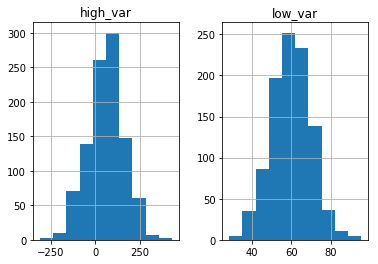

low_var     59.903909
high_var    60.164851
dtype: float64
low_var       9.844733
high_var    100.151947
dtype: float64


In [18]:
# Take a random sample of 100 observations from each variable
# and store it in a new dataframe.
sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 1000)
sample['high_var']=np.random.choice(pop['high_var'], 1000)

# Again, visualize the data. Note that here we're using a pandas method to 
# create the histogram.
sample.hist()
plt.show()

# Check how well the sample replicates the population.
print(sample.mean())
print(sample.std(ddof=1))

In [19]:
sample.describe()

,low_var,high_var
count,1000.000000,1000.000000
mean,59.903909,60.164851
std,9.844733,100.151947
min,28.531163,-310.779497
25%,53.400742,-4.101290
50%,60.185410,64.404453
75%,66.855744,126.859022
max,95.405883,431.971102


In [ ]:
Bernoulli: represents two possible outcomes of an event (such as a coin flip). 
Binomial: counts the number of successes when an event with two possible outcomes is repeated many times 
(such as many coin flips). 
Gamma: represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die
in old age), then becomes less likely again (few people die in extreme old age because most have already died).
Poisson: represents the number of times a given event (such as a phone call to a radio show) will occur during a given time 
interval. Data can range from 0 (no phone calls during the time period) to approaching infinity (the phone never stopp
during the time period). 


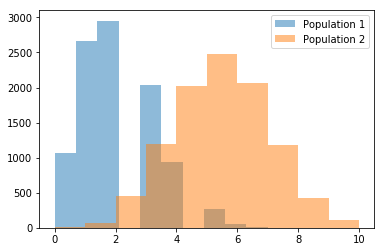

In [29]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

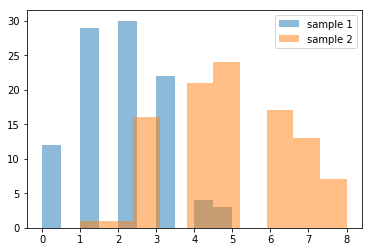

In [35]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [36]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

1.86
5.04
1.1833849753989611
1.5551205741035001
3.1799999999999997


In [37]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

16.272851567106038


In [38]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=16.191282875171282, pvalue=2.733821632915241e-37)
